In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('pokemon.csv')

In [6]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [7]:
df['type2'].fillna('None', inplace=True)

In [8]:
df["type1"] = df["type1"].astype('category')
df["type2"] = df["type2"].astype('category')
df.dtypes

abilities              object
against_bug           float64
against_dark          float64
against_dragon        float64
against_electric      float64
against_fairy         float64
against_fight         float64
against_fire          float64
against_flying        float64
against_ghost         float64
against_grass         float64
against_ground        float64
against_ice           float64
against_normal        float64
against_poison        float64
against_psychic       float64
against_rock          float64
against_steel         float64
against_water         float64
attack                  int64
base_egg_steps          int64
base_happiness          int64
base_total              int64
capture_rate           object
classfication          object
defense                 int64
experience_growth       int64
height_m              float64
hp                      int64
japanese_name          object
name                   object
percentage_male       float64
pokedex_number          int64
sp_attack 

In [9]:
df["type1_cat"] = df["type1"].cat.codes
df["type2_cat"] = df["type2"].cat.codes

In [10]:
df.drop("type1",axis=1, inplace=True)
df.drop("type2",axis=1, inplace=True)

In [11]:
df.drop('abilities',axis=1, inplace=True)

In [12]:
df.drop('pokedex_number',axis=1, inplace=True)

In [13]:

df.drop('japanese_name',axis=1, inplace=True)
df.drop('name',axis=1, inplace=True)

In [14]:
df.drop('classfication',axis=1, inplace=True)

In [15]:
df = df[pd.to_numeric(df['capture_rate'], errors='coerce').notnull()]

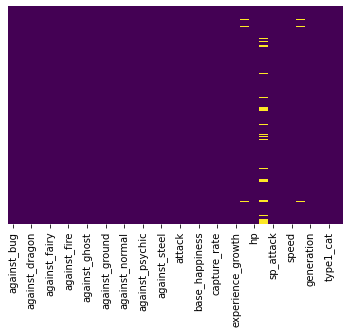

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
df.isna().sum()

against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
defense               0
experience_growth     0
height_m             20
hp                    0
percentage_male      97
sp_attack             0
sp_defense            0
speed                 0
weight_kg            20
generation            0
is_legendary          0
type1_cat             0
type2_cat             0
dtype: int64

In [18]:
#used more sophisticated imputation later
df['height_m'].fillna((df['height_m'].mean()), inplace=True)
df['weight_kg'].fillna((df['weight_kg'].mean()), inplace=True)
df['percentage_male'].fillna((df['percentage_male'].mean()), inplace=True)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('is_legendary',axis=1)
y = df['is_legendary']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtree = DecisionTreeClassifier()

In [24]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
predictions = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00        26

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [28]:
print(confusion_matrix(y_test,predictions))

[[214   0]
 [  0  26]]


### Random Forrest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
rfc_pred = rfc.predict(X_test)

In [31]:
print(confusion_matrix(y_test,rfc_pred))

[[214   0]
 [  4  22]]


In [32]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       214
           1       1.00      0.85      0.92        26

    accuracy                           0.98       240
   macro avg       0.99      0.92      0.95       240
weighted avg       0.98      0.98      0.98       240



### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [35]:
lr_predictions = logmodel.predict(X_test)

In [36]:
print(confusion_matrix(y_test,lr_predictions))

[[213   1]
 [  5  21]]


In [37]:
print(classification_report(y_test,lr_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       214
           1       0.95      0.81      0.88        26

    accuracy                           0.97       240
   macro avg       0.97      0.90      0.93       240
weighted avg       0.97      0.97      0.97       240

